Crystal Posey
April 18, 2022
GIS5112: GIS Databases 
Project Code

*Utilizing the Entity Relationship Model (ER-Model) to normalize the existing City of Tallahassee’s stormwater infrastructure database, hosting the PostgreSQL database as a back-end through the Amazon Web Services' (AWS)   Relational Database Service (RDS) cloud computing platform and implementing Python and Structured Query Language (SQL) through PostgresSQL psycopg-binary module to develop a front-end  Pandas module function to manage and display stormwater features.*


## **The database has been deleted from AWS and cannot be accessed anymore.**

**Objectives**


* Conceptualize the normalization and physical design of the existing City’s stormwater infrastructure (SWI) relational database using the Entity Relationship Model’s (ER-Model) principles and concepts, such as primary and foreign keys. 
* Utilize pgadmin and PostGIS to import each stormwater feature in the SWI network through the shp2pgsql-gui.exe extension and create a table for every feature. 
* Develop queries to retrieve stormwater features with their corresponding Survey/As Built from multiple tables connected through primary and foriegn keys and to perform a spatial analysis utilizing the PostGIS functions to select stormwater features within a polygon (parcel).
* Add and connect the SWI PostgreSQL database from the Amazon Web Services (AWS) Relational Database Service (RDS) cloud computing platform to the Python module "psycopg2".
* Implement the pandas module to develop a function that will mimick a front-end search interface with the stored SQL queries.



### **Original Physical Database Design**

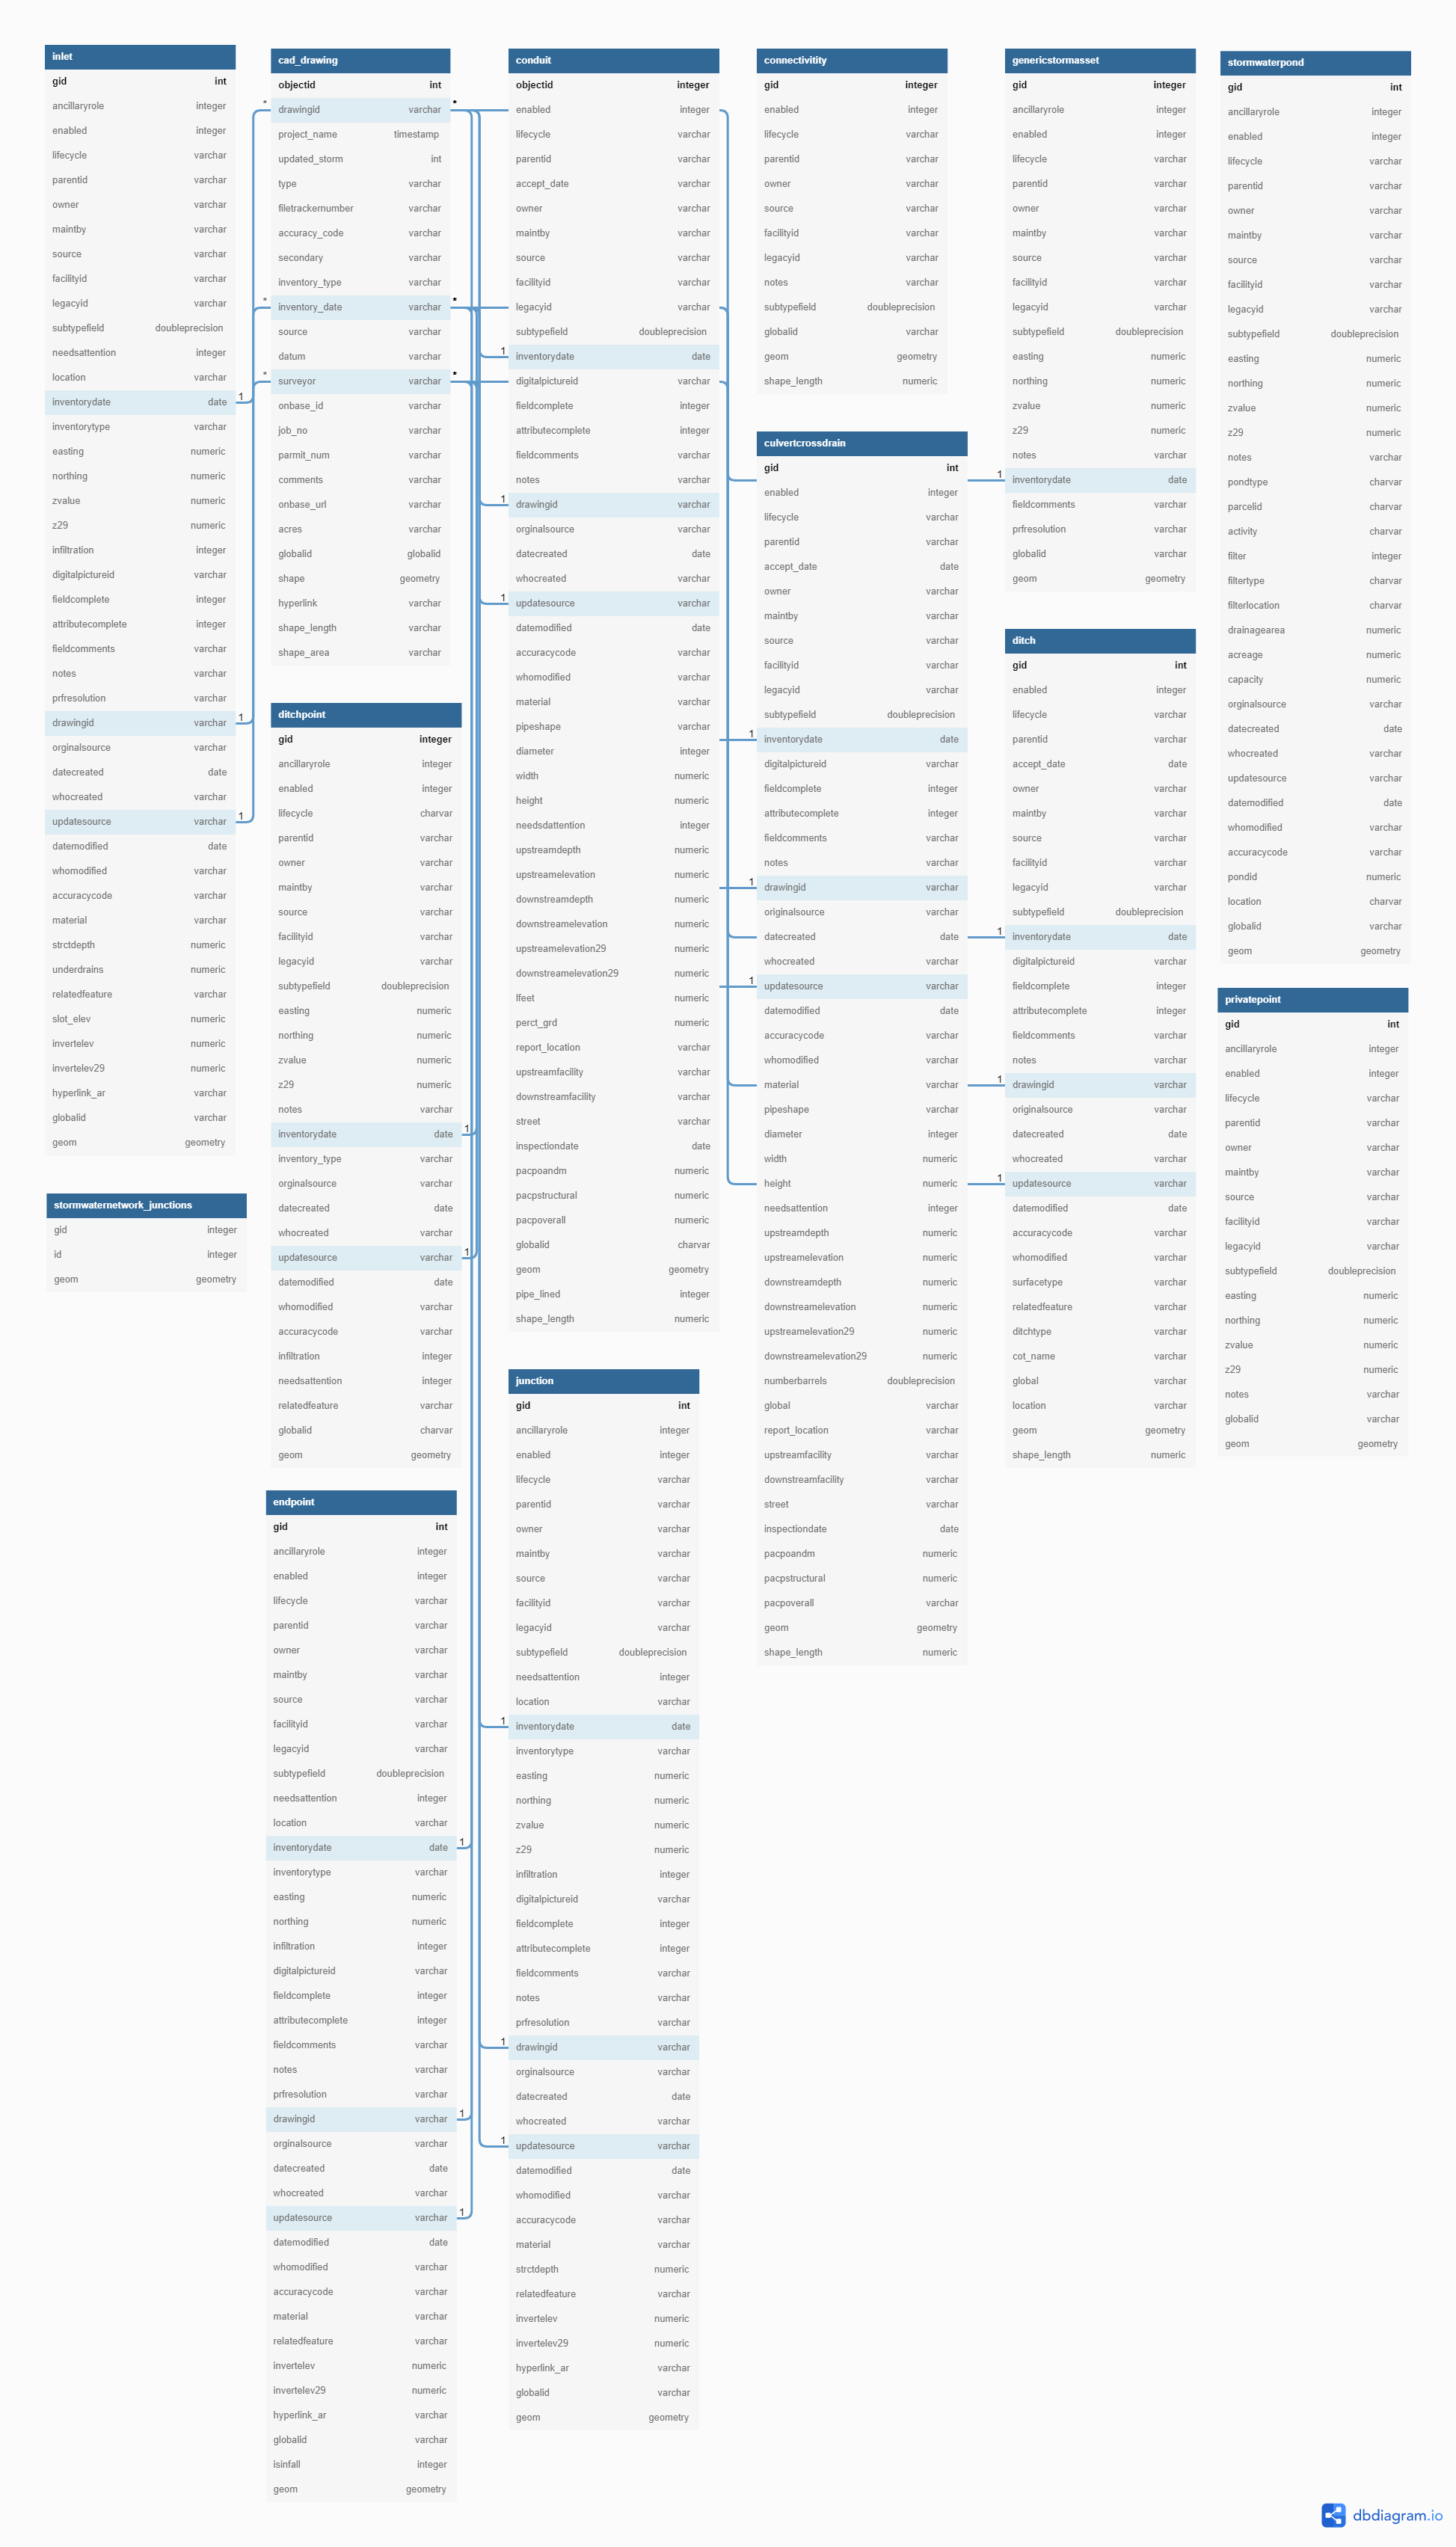

### **Noramlized Physical Database Design**

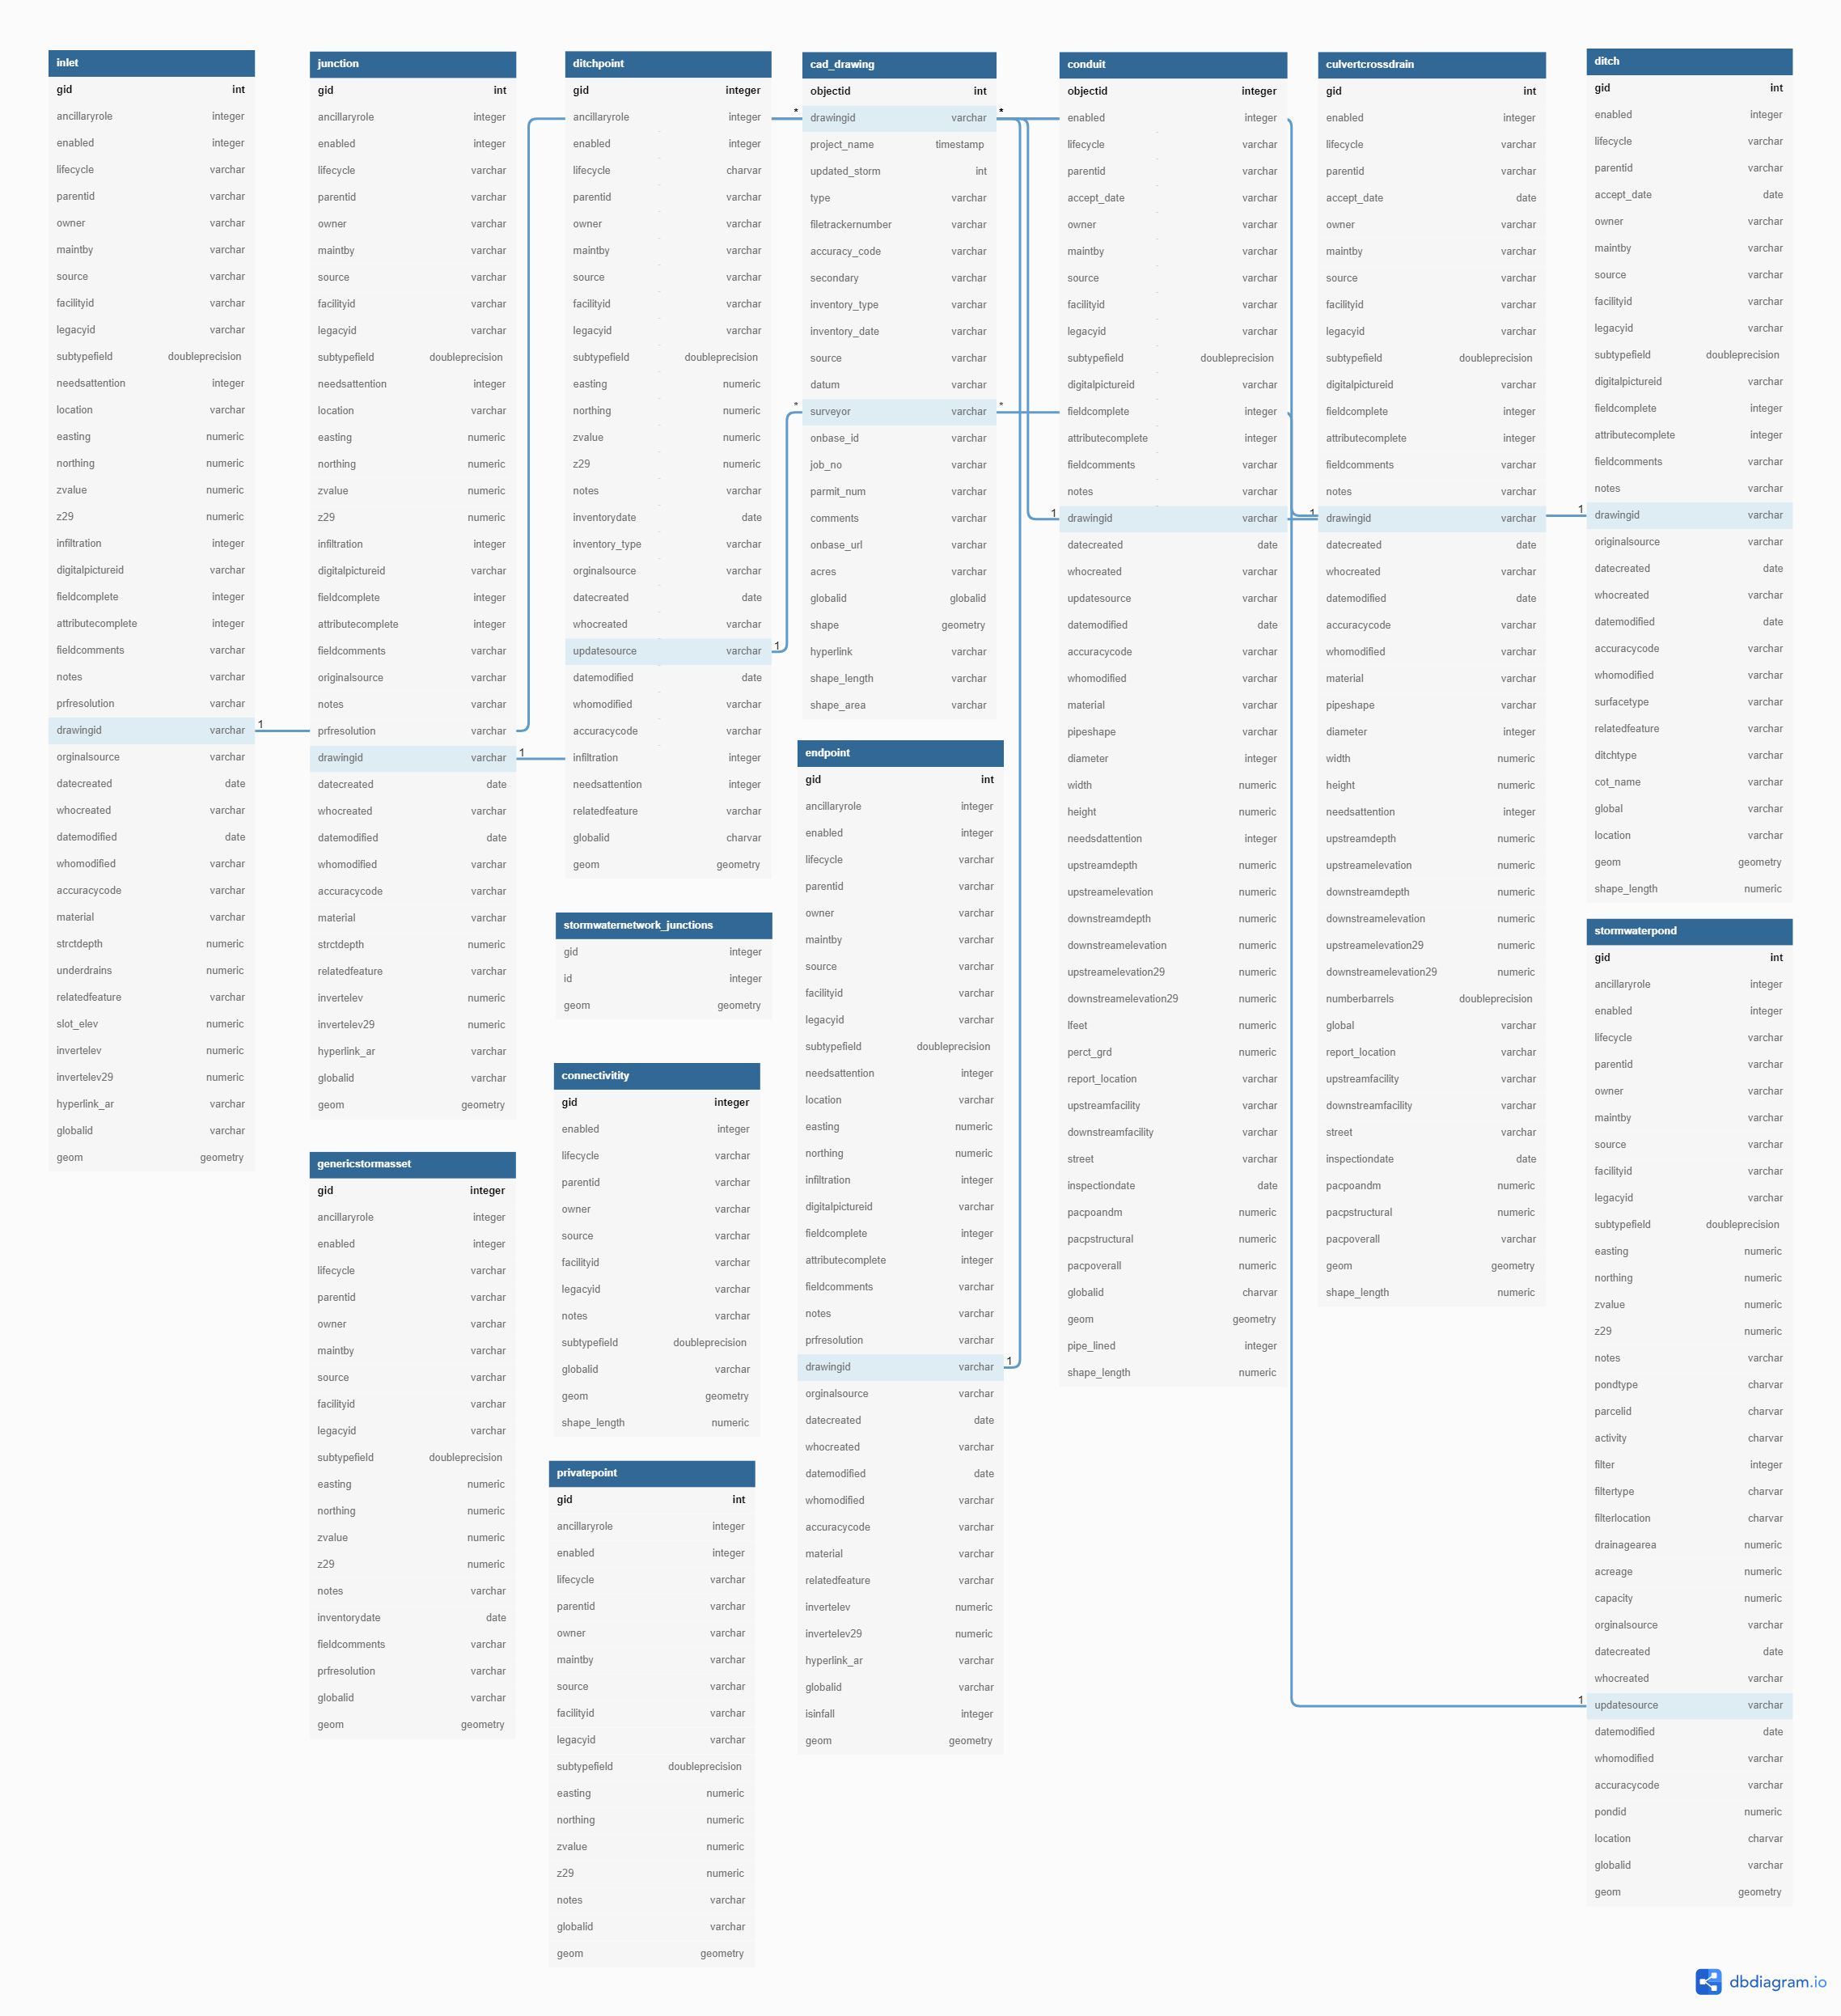

In [ ]:
% pip install psycopg2-binary

#download the packages. psycopg2-binary is important to use instead of psycopg2 because it contains a compiled wheel already which is essentially better for beginners or testing software.

In [ ]:
###import packages for project###
import pandas as pd #data analysis and manipulation tool (Source: https://pandas.pydata.org/)
import psycopg2 #PostgreSQL database adapter for the Python programming (Source: https://pypi.org/project/psycopg2/)


In [ ]:
#connect to the Amazon Web Service RD Cloud Instance that contains the Postgre Database stored on my local drive at home. Database name, username, password, instance/host, and port are all a part of the connection properties.
engine = psycopg2.connect(
    database="MapleRidge",
    user="#####",
    password="######",
    host="mapleridge-sw1.cfrmnxva48mk.us-east-1.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor() #cursors are essentially a pointer in a database row. It processes individual rows within a query. (Source: https://www.sqlservertutorial.net/sql-server-stored-procedures/sql-server-cursor/)

In [ ]:
##Printing out Tables in Database##
sql = """
select * from information_schema.tables
where table_schema = 'stormwater'
"""
pd.read_sql(sql, con=engine)

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,MapleRidge,stormwater,ditchpoint,BASE TABLE,None,None,None,None,None,YES,NO,None
1,MapleRidge,stormwater,junctions,BASE TABLE,None,None,None,None,None,YES,NO,None
2,MapleRidge,stormwater,privatepoint,BASE TABLE,None,None,None,None,None,YES,NO,None
3,MapleRidge,stormwater,stormwaterpond,BASE TABLE,None,None,None,None,None,YES,NO,None
4,MapleRidge,stormwater,cad_drawings,BASE TABLE,None,None,None,None,None,YES,NO,None
5,MapleRidge,stormwater,conduit,BASE TABLE,None,None,None,None,None,YES,NO,None
6,MapleRidge,stormwater,endpoint,BASE TABLE,None,None,None,None,None,YES,NO,None
7,MapleRidge,stormwater,genericstormasset,BASE TABLE,None,None,None,None,None,YES,NO,None
8,MapleRidge,stormwater,parcel,BASE TABLE,None,None,None,None,None,YES,NO,None
9,MapleRidge,stormwater,connectivitity,BASE TABLE,None,None,None,None,None,YES,NO,None


Dropping columns in tables after normalization. 

In [ ]:
#dropping columns that were removed after normalization. this was done for the conduit, junction, endpoint, inlet, culvertcrossdrain, and ditch tables. an example of the code is provided below using the conduit table.

#Conduit
sql_drop_conduit1 = """ALTER TABLE stormwater.conduit
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_conduit1, con=engine)

In [ ]:
sql_drop_conduit2 = """ALTER TABLE stormwater.conduit
DROP COLUMN inventoryt""";
pd.read_sql(sql_drop_conduit2, con=engine)

In [ ]:
sql_drop_conduit3 = """ALTER TABLE stormwater.conduit
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_conduit3, con=engine)

In [ ]:
#Junction
sql_drop_junction1 = """ALTER TABLE stormwater.junction
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_junction1, con=engine)

In [ ]:
sql_drop_conduit2 = """ALTER TABLE stormwater.junction
DROP COLUMN inventoryt""";
pd.read_sql(sql_drop_junction2, con=engine)

In [ ]:
sql_drop_junction3 = """ALTER TABLE stormwater.junction
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_junction3, con=engine)

In [ ]:
#Endpoint
sql_drop_endpoint1 = """ALTER TABLE stormwater.endpoint
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_endpoint1, con=engine)

In [ ]:
sql_drop_endpoint2 = """ALTER TABLE stormwater.endpoint
DROP COLUMN inventoryt""";
pd.read_sql(sql_drop_endpoint2, con=engine)

In [ ]:
sql_drop_endpoint3 = """ALTER TABLE stormwater.endpoint
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_endpoint3, con=engine)

In [ ]:
#Inlet
sql_drop_inlet1 = """ALTER TABLE stormwater.inlet
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_inlet1, con=engine)

In [ ]:
sql_drop_inlet2 = """ALTER TABLE stormwater.inlet
DROP COLUMN inventoryt""";
pd.read_sql(sql_drop_inlet2, con=engine)

In [ ]:
sql_drop_inlet3 = """ALTER TABLE stormwater.inlet
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_inlet3, con=engine)

In [ ]:
#Culvertcrossdrain
sql_drop_culvertcrossdrain1 = """ALTER TABLE stormwater.culvertcrossdrain
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_culvertcrossdrain1, con=engine)

In [ ]:
sql_drop_culvertcrossdrain3 = """ALTER TABLE stormwater.culvertcrossdrain
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_culvertcrossdrain3, con=engine)

In [ ]:
#Ditch
sql_drop_ditch1 = """ALTER TABLE stormwater.ditch
DROP COLUMN inventoryd""";
pd.read_sql(sql_drop_ditch1, con=engine)

In [ ]:
sql_drop_ditch2 = """ALTER TABLE stormwater.ditch
DROP COLUMN inventoryt""";
pd.read_sql(sql_drop_ditch2, con=engine)

In [ ]:
sql_drop_ditch3 = """ALTER TABLE stormwater.ditch
DROP COLUMN updatesour""";
pd.read_sql(sql_drop_ditch3, con=engine)

Printing tables and their data types.

In [ ]:
sql_conduit = """SELECT column_name, data_type 
FROM information_schema.columns 
WHERE table_name = 'conduit'
ORDER BY column_name
""";
pd.read_sql(sql_conduit, con=engine) #Outputting column_name and their data types to see dropped columns, existing columns, and the data types.

,column_name,data_type
0,accept_dat,character varying
1,accuracyco,character varying
2,attributec,integer
3,datecreate,date
4,datemodifi,date
5,diameter,integer
6,digitalpic,character varying
7,downstre_1,numeric
8,downstre_2,numeric
9,downstre_3,character varying


In the next portion of the project, I will utilize the functions in the panda package and user input to execute, fetch, and display queried results from the AWS RDS cloud PostgreSQL database. The SQL query execution starts with assigning a variable in Python that contains a SQL command/query to sort through the database and display the results that are commanded. Each SQL query is assigned as a string with a %s at the end of the statement inorder concatenate strings together and to format a value inside a string. That value will be inputed by the user through the input() function. The query will be executed using the pandas' pd.read_sql() function. This pandas function takes three aruments; the assigned SQL query variable, the database connection variable,and the user input value assigned to the *params* variable.

In [ ]:
##Stormwater Application Function with SQL statements##
def stormwater_app():
  menu = """Enter one of the fields:
  1) Search by DrawingID to output its corresponding stormwater data
  2) Search by FacilityID to output its corresponding stormwater data
  3) Search by ParcelID to output conduits within the parcel
  4) Exit

  Your selection:  """
  welcome = """The following information includes data on the stormwater networks and/or its location within the parcel."""
  print(welcome)

  user_input=input(menu)
  while user_input != "4":
      if user_input == '1':
        drawingid = input("DrawingID: ") #Enter 'Southwood LSF3 Asbuilt' without quotations
        drawingid_sql = """
          SELECT cad_drawings.inventory1 As inventorydate, cad_drawings.inventory_ As inventorytype, cad_drawings.hyperlink,
          cad_drawings.surveyor, conduit.drawingid, conduit.originalso As originalsource
          FROM stormwater.conduit INNER JOIN stormwater.cad_drawings
          ON conduit.drawingid = cad_drawings.drawingid
          WHERE conduit.drawingid = %s  
          """
        return pd.read_sql(drawingid_sql, con=engine, params=(drawingid,))
      elif user_input == '2':
        facilityid = input("FacilityID: ") #Enter any conduit's facilityid or 'DC0041829' without quotations
        facilityid_sql = """
          SELECT * FROM stormwater.conduit WHERE facilityid = %s
          """
        return pd.read_sql(facilityid_sql, con=engine, params=(facilityid,))
      elif user_input=='3':
          taxid = input("Parcel TaxID: ") #Enter '31102100H0080' without quotations in the box when prompted.
          parcel_sql = """
          SELECT conduit.facilityid, conduit.drawingid, conduit.originalso As originalsource FROM stormwater.conduit CROSS JOIN stormwater.parcel WHERE parcel.taxid = %s AND ST_Intersects(parcel.geom, conduit.geom)
          """
          return pd.read_sql(parcel_sql, con=engine, params=(taxid,))
      else:
          print("Invalid Number")
stormwater_app()

#Utilized the https://pysql.tecladocode.com/ course for this project and code.



The following information includes data on the stormwater networks and/or its location within the parcel.
Enter one of the fields:
  1) Search by DrawingID to output its corresponding stormwater data
  2) Search by FacilityID to output its corresponding stormwater data
  3) Search by ParcelID to output conduits within the parcel
  4) Exit

  Your selection:  3
Parcel TaxID: 31102100H0080


,facilityid,drawingid,originalsource
0,DC0041845,Southwood LSF3 Asbuilt,"Thurman Roddenberry and Associates, Inc."


In [ ]:
#SQL command that selects conduits with a linear feet greater than 150 ft and identifying inlets that are located upstream.
sql_command = """SELECT (conduit.lfeet*0.3048) As lfeet_m, ST_Length(conduit.geom::geography), 
inlet.facilityid As inlet_fid, conduit.facilityid As conduit_fid, conduit.upstreamde-conduit.downstre_1 As slantofconduit
FROM stormwater.conduit INNER JOIN stormwater.inlet ON conduit.upstreamfa = inlet.facilityid
WHERE conduit.lfeet>150
""";
pd.read_sql(sql_command, con=engine) #Outputting column_name and their data types to see dropped columns, existing columns, and the data types.
#source of ST_Length conversion: https://gis.stackexchange.com/questions/286782/calculating-length-of-lines-using-postgis

,lfeet_m,st_length,inlet_fid,conduit_fid,slantofconduit
0,114.6048,114.533965,DI0029073,DC0041809,-103.26
1,81.3816,81.105229,DI0029082,DC0041818,-112.64
2,57.3024,56.892939,DI0029103,DC0041846,-111.09
3,56.6928,56.532953,DI0029105,DC0041843,-103.43
4,62.1792,62.574011,DI0029059,DC0041789,-133.95
5,72.8472,72.672616,DI0029088,DC0041831,-111.09
6,53.6448,53.515505,DI0029068,DC0041800,-141.38
7,96.9264,97.756134,DI0029076,DC0041847,-96.33
8,79.2480,79.530954,DI0029107,DC0041845,-105.58
9,110.9472,110.821174,DI0029061,DC0041794,-141.65
